# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Importing Libraries

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

minmax = MinMaxScaler()

import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier


# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [6]:
features = [col for col in df.columns if col not in ['target']]

In [7]:
X_train[features] = minmax.fit_transform(X_train[features])

pca = PCA(n_components=None)
pca.fit(X_train)

explained_ratio = pca.explained_variance_ratio_
cumsum_ratio = np.cumsum(explained_ratio)

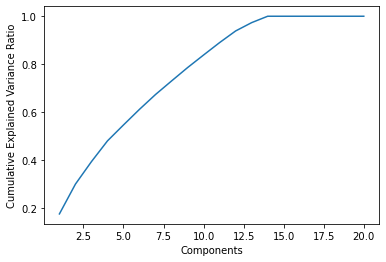

In [8]:
plt.plot(range(1, len(cumsum_ratio) + 1), cumsum_ratio)
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

> As we can see from the graph above, we can use around 13 components.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

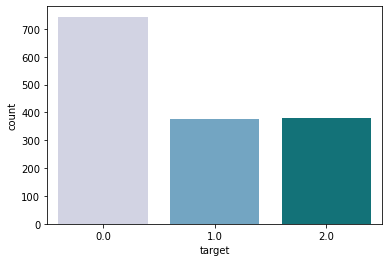

In [9]:
_ = sns.countplot(data = df, x = 'target', palette='PuBuGn')

> Target classes are imbalance. So instead of accuracy we can user Precision or Recall for evaluation. 

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [10]:
X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
lr = LogisticRegression()

_ = lr.fit(X_train, y_training)

preds = lr.predict(X_test)

In [12]:
print(f"Accuracy: {accuracy_score(preds, y_test)}")

print(f"Precision: {precision_score(preds, y_test, average = 'macro')}")

print(f"Recall: {recall_score(preds, y_test, average = 'macro')}")

Accuracy: 0.7233333333333334
Precision: 0.6975567885255348
Recall: 0.731010101010101


In [13]:
# Predictions on Training Set
preds = lr.predict(X_train)

In [14]:
print(f"Accuracy: {accuracy_score(preds, y_training)}")
print(f"Precision: {precision_score(preds, y_training, average = 'macro')}")
print(f"Recall: {recall_score(preds, y_training, average = 'macro')}")

Accuracy: 0.7141666666666666
Precision: 0.6796024430457894
Recall: 0.7032658884233097


> Without using PCA, above are the results. in the next question we will evaluate the model with using PCA, and then we will decie which model to use.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [15]:
modeling_pipeline = Pipeline([
            ('Min Max Scaling', MinMaxScaler()),
             ('PCA', PCA(n_components=13)),
             ('LR', LogisticRegression())
            ])

_ = modeling_pipeline.fit(X_train, y_training)

preds = modeling_pipeline.predict(X_test)

In [16]:
print(f"Accuracy: {accuracy_score(preds, y_test)}")

print(f"Precision: {precision_score(preds, y_test, average = 'macro')}")

print(f"Recall: {recall_score(preds, y_test, average = 'macro')}")

Accuracy: 0.6933333333333334
Precision: 0.6649691958642204
Recall: 0.7018391544253614


> As we can see from the results, The model without PCA performed slightly better.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [17]:
dt = DecisionTreeClassifier(random_state = 133)

_ = dt.fit(X_train, y_training)

preds = dt.predict(X_test)

In [18]:
print(f"Accuracy: {accuracy_score(preds, y_test)}")

print(f"Precision: {precision_score(preds, y_test, average = 'macro')}")

print(f"Recall: {recall_score(preds, y_test, average = 'macro')}")

Accuracy: 0.7333333333333333
Precision: 0.7314477491258082
Recall: 0.7228648544438019


> The decision tree model perfomed better than the logistic regression model.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [19]:
modeling_pipeline = Pipeline([
            ('Min Max Scaling', MinMaxScaler()),
             ('PCA', PCA(n_components=13)),
             ('DT', DecisionTreeClassifier(random_state = 133))
            ])

_ = modeling_pipeline.fit(X_train, y_training)

preds = modeling_pipeline.predict(X_test)

In [20]:
print(f"Accuracy: {accuracy_score(preds, y_test)}")
print(f"Precision: {precision_score(preds, y_test, average = 'macro')}")
print(f"Recall: {recall_score(preds, y_test, average = 'macro')}")

Accuracy: 0.6333333333333333
Precision: 0.6173419590947627
Recall: 0.6175574116533827


> After using PCA, the decision tree model performed very poorly. 